# World War II: A Network Analysis

### by Aalisha Patil, Rohan Parikh and Shubhangi Hora

## Introduction

The network under consideration in this paper is representative of the invasions and attacks that took place between countries during World War 2. The second world war, which evolved as a consequence of some unsettled disputes from the first world war began in 1939 and lasted till 1945. A vast majority of the world’s countries became involved in the war and two opposing military sides: The Allies and the Axis were formed. It is known as the deadliest war in history and marks 50 to 85 million fatalities. It is interesting to note the turn of events during those years and the dynamics of international relations that countries indulged in, to reap most military, economic and strategic benefits from the war. The trajectory of the war was not random but was based on specific linkages. We decided to use network analysis to decipher the connections and interactions in the war since it the most relevant quantitative measure. The rationale behind choosing this network is that growing international tensions are a cause of concern and we feel that along with that there is an increasing need to study past international affairs to gain insights that could be useful in the future. 
The network has been modelled based on the following specifications:

•	Each country (irrespective of size and extent of contribution to the war) represents a node/vertex. 

•	There is a link between two nodes if there was a military conflict between the two countries representing the nodes.

•	The graph is a directed graph. An edge is directed from node 1 to node 2 if the country representing node 1 invaded or initiated a military conflict with the country representing node 2. Phrases like ‘invasion, declaration of war and annexation’ have been used to specify the edges. This shows that the country was involved in some sort of military conflict.

Doing a network analysis of the military interactions between countries during the second world war hopes to provide insights regarding the following questions:

(a)	Which country was the most involved in military conflict

(b)	Which country invaded the most number of countries

(c)	Which country was invaded the most 

(d)	Which country was the most powerful

(e)	The influence of “key players” countries in the network 

(f)	The stance of a country (onlooker, active/passive participant)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections
import scipy.stats

## The Network

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

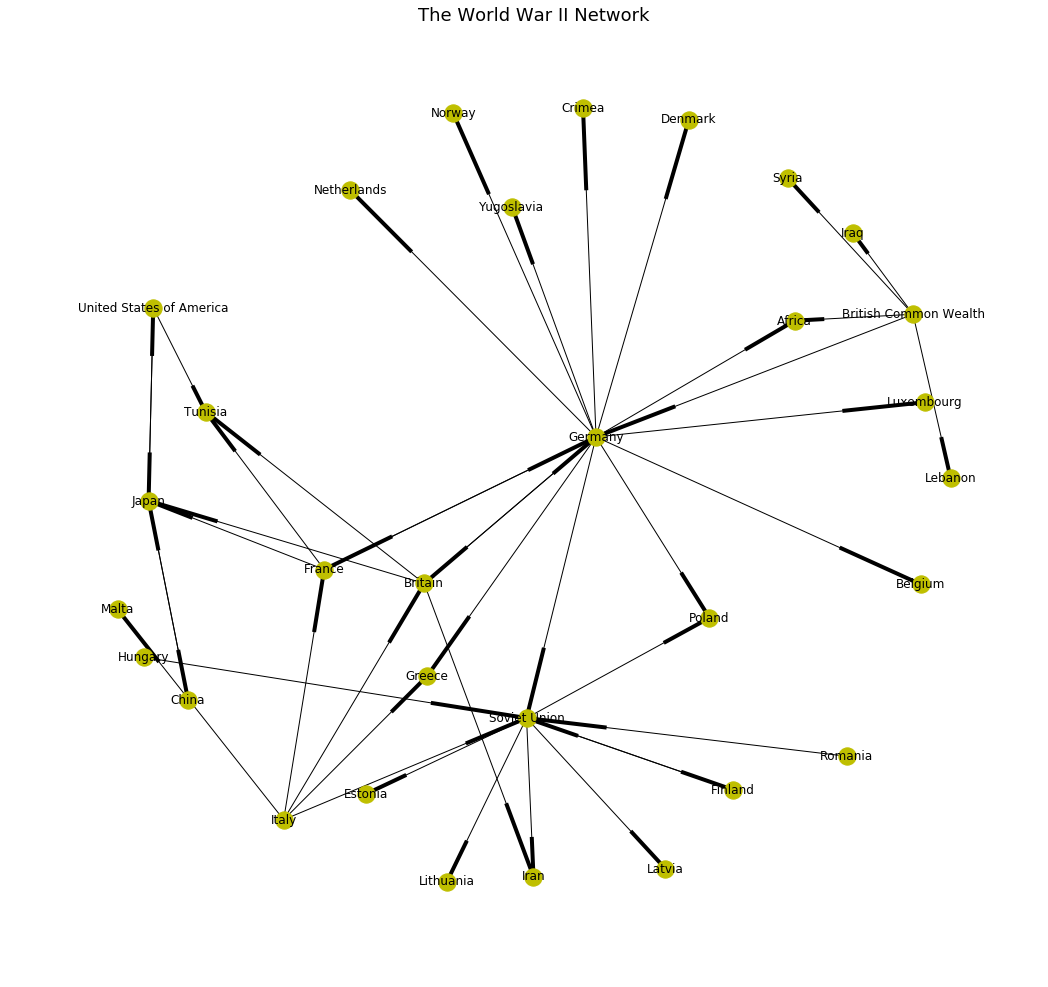

In [37]:
#creating the dictionary of the network, where the values assigned to a key are the countries that were invaved by the key country
graph = {"British Common Wealth":["Syria","Iraq","Africa","Germany","Lebanon"],
"Hungary":["Soviet Union"],
"Soviet Union":["Iran","Poland","Finland","Lithuania","Latvia","Estonia"],
"China":["Japan"],
"United States of America":["Japan","Tunisia"],
"Germany":["Greece","Soviet Union","Yugoslavia","Poland","Britain","France","Denmark","Norway","Belgium","Netherlands","Luxembourg","Africa","Crimea"],
"Japan":["China","United States of America"],
"Italy":["Malta","France","Britain","Soviet Union","Greece"],
"Romania":["Soviet Union"],
"Finland":["Soviet Union"],
"France":["Japan","Tunisia","Germany"],
"Britain":["Japan","Tunisia","Iran","Germany"]}

#drawing the network
g = nx.DiGraph(graph)
nx.draw(g, node_color = 'y', with_labels = True)
plt.title("The World War II Network", fontsize = 18)
plt.savefig("network_ww2.png")

#enlarging the network so it is clearly visible
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size
plt.show()


## Size and Order of the Network

In [38]:
s = g.size()        #number of edges
o = g.order()     #number of nodes
print("the size is "+ str(s)+" and the order is "+str(o))

the size is 44 and the order is 31


<font color = blue> The order of the Graph is 31 which represents the number of countries embroiled in the Second World War.  The size of the graph is 44 which represents the number of attacks or invasions that took place during the Second World War. </font>

## In-degrees and Out-degrees

In [39]:
#calculating the in-degree
ind = g.in_degree()
print("the in-degrees are: " +str(ind))

the in-degrees are: {'British Common Wealth': 0, 'Hungary': 0, 'Soviet Union': 5, 'China': 1, 'United States of America': 1, 'Germany': 3, 'Japan': 4, 'Italy': 0, 'Romania': 0, 'Finland': 1, 'France': 2, 'Britain': 2, 'Syria': 1, 'Iraq': 1, 'Africa': 2, 'Lebanon': 1, 'Iran': 2, 'Poland': 2, 'Lithuania': 1, 'Latvia': 1, 'Estonia': 1, 'Tunisia': 3, 'Greece': 2, 'Yugoslavia': 1, 'Denmark': 1, 'Norway': 1, 'Belgium': 1, 'Netherlands': 1, 'Luxembourg': 1, 'Crimea': 1, 'Malta': 1}


In [40]:
#calculating the out-degree
outd = g.out_degree()
print("\nthe out-degrees are: " +str(outd))


the out-degrees are: {'British Common Wealth': 5, 'Hungary': 1, 'Soviet Union': 6, 'China': 1, 'United States of America': 2, 'Germany': 13, 'Japan': 2, 'Italy': 5, 'Romania': 1, 'Finland': 1, 'France': 3, 'Britain': 4, 'Syria': 0, 'Iraq': 0, 'Africa': 0, 'Lebanon': 0, 'Iran': 0, 'Poland': 0, 'Lithuania': 0, 'Latvia': 0, 'Estonia': 0, 'Tunisia': 0, 'Greece': 0, 'Yugoslavia': 0, 'Denmark': 0, 'Norway': 0, 'Belgium': 0, 'Netherlands': 0, 'Luxembourg': 0, 'Crimea': 0, 'Malta': 0}


<font color = blue>  The Soviet Union has the highest In-degree followed by Japan which means they were invaded the most number of times, (Soviet Union: 5, Japan: 4). Germany has the highest Out-degree (13) which means it invaded the most number of countries. </font>

## Plotting the Out-degree

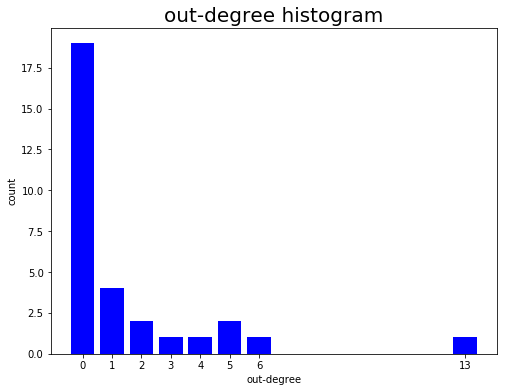

In [41]:
#degree histogram
dseq = sorted(outd.values(), reverse = True)
dcount = collections.Counter(dseq)
deg, cnt = zip(*dcount.items())

#minimizing the graphs
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


#plot histogram
fig, ax = plt.subplots()
plt.bar(deg, cnt, width = 0.80, color = 'b')
plt.title("out-degree histogram", fontsize = 20)
plt.ylabel("count")
plt.xlabel("out-degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
plt.savefig("od_hist.png")
plt.show()


<font color = blue> The above graph plots the various out-degrees present in this network against the number of nodes that posess said out-degree, i.e., the graph shows that there is only one node (Germany) with an out-degree of 13, while there are 19 nodes that have an out-degree of 0. This means that 19 countries didn't invade any contries, and Germany invaded 13 countries. </font>

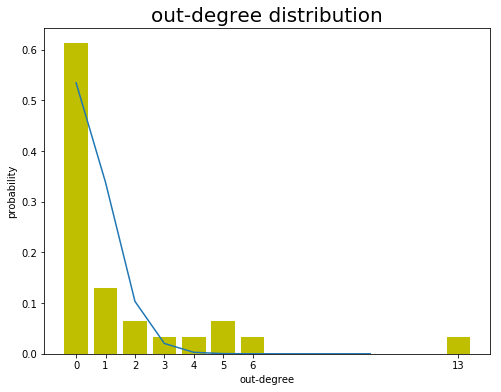

In [7]:
#plot distribution
n, p = 31, 0.02
fig, ax = plt.subplots()
plt.bar(deg, cnt/(np.sum(cnt)), width = 0.80, color = 'y')
plt.title("out-degree distribution", fontsize = 20)
plt.ylabel("probability")
plt.xlabel("out-degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#plotting the binomial function
x = scipy.linspace(0, 10, 11)
pmf = scipy.stats.binom.pmf(x, n, p)
plt.plot(x, pmf)
plt.savefig("od_dist.png")
plt.show()

<font color = blue> The above distribution gives the fraction of nodes that have deg_out(v) edges. </font>

## Plotting the In-degree

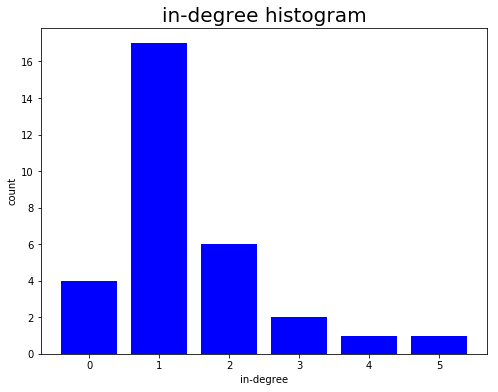

In [8]:
#degree histogram and distribution for in-degree
dseq = sorted(ind.values(), reverse = True)
dcount = collections.Counter(dseq)
ideg, icnt = zip(*dcount.items())

#plot histogram
fig, ax = plt.subplots()
plt.bar(ideg, icnt, width = 0.80, color = 'b')
plt.title("in-degree histogram", fontsize = 20)
plt.ylabel("count")
plt.xlabel("in-degree")
ax.set_xticks([d for d in ideg])
ax.set_xticklabels(ideg)
plt.savefig("id_hist.png")
plt.show()

<font color = blue> The above graph plots the various in-degrees present in this network against the number of nodes that posess said in-degree, i.e., the graph shows that there are two nodes with an in-degree of 4 and 5 respectively, while there are 18 nodes that have an out-degree of 1. This means that 18 countries were invaded only by one country, while one country was invaded by four other countries, and another by five other countries. 

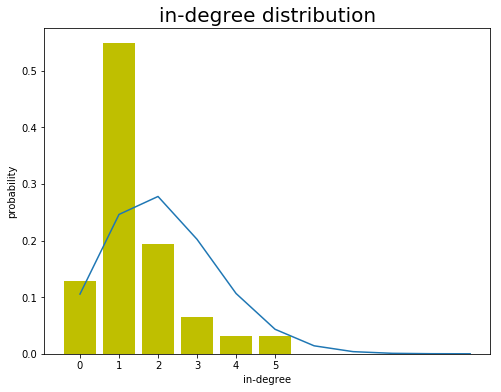

In [9]:
#plot distribution
fig, ax = plt.subplots()
plt.bar(ideg, icnt/(np.sum(icnt)), width = 0.80, color = 'y')
plt.title("in-degree distribution", fontsize = 20)
plt.ylabel("probability")
plt.xlabel("in-degree")
ax.set_xticks([d for d in ideg])
ax.set_xticklabels(ideg)
n, p = 31, 0.07

#plotting the binomial function
x = scipy.linspace(0, 10, 11)
pmf = scipy.stats.binom.pmf(x, n, p)
plt.plot(x, pmf)
plt.savefig("id_dist.png")
plt.show()


<font color = blue> The above distribution gives the fraction of nodes that have deg_in(v) edges.

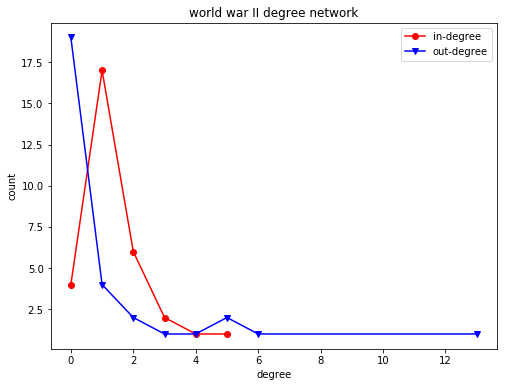

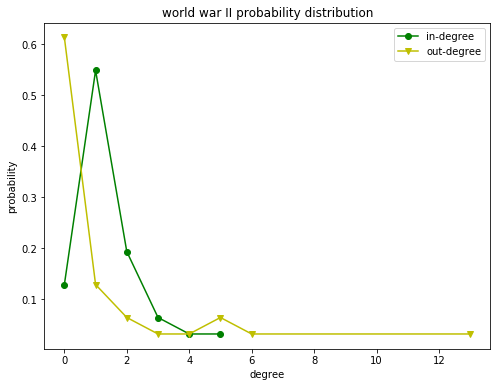

In [10]:
#plotting both the degrees histogram
plt.plot(ideg, icnt, 'ro-')
plt.plot(deg, cnt, 'bv-')
plt.xlabel("degree")
plt.ylabel("count")
plt.legend(["in-degree", "out-degree"])
plt.title("world war II degree network")
plt.savefig("ww2_deg.png")
plt.show()

#plotting both the degree distributions
plt.plot(ideg, (icnt/np.sum(icnt)), 'go-')
plt.plot(deg, (cnt/np.sum(cnt)), 'yv-')
plt.xlabel("degree")
plt.ylabel("probability")
plt.legend(["in-degree", "out-degree"])
plt.title("world war II probability distribution")
plt.savefig("ww2_dist.png")
plt.show()


In [11]:
#the adjacency matrix of the network

a = nx.linalg.adjacency_matrix(g)
s = a.toarray()
print(s)

[[0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

<font color = blue> Above is an Adjacency Matrix used to represent the World War 2 Network. The Adjacency Matrix is a 2D array of size V x V where V is the number of vertices in the Network. A slot adj[i][j] = 1 in the Matrix indicates that there is an edge from vertex i to vertex j. 

## The Average Shortest Path Length

In [12]:
l = nx.average_shortest_path_length(g)
print(l)

0.31290322580645163


<font color = blue> The Average Shortest Path Length of the network is 0.3129 and is defined as the average number of steps along the shortest paths for all possible pairs of network nodes. 

## The Clustering Coefficient

In [13]:
ug = g.to_undirected() #converting the digraph into an undirected graph
c = nx.average_clustering(ug)
print("avg clustering coefficient = "+str(c))

avg clustering coefficient = 0.0691677498129111


<font color = blue> In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The World War 2 Network has a low average clustering coefficient of 0.0691677498129111.

Since the clustering coefficient is low, the network doesn't display any small-world properties. It does, however, display random graph properties since random graphs have a low clustering coefficient.

## Random Graph 

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

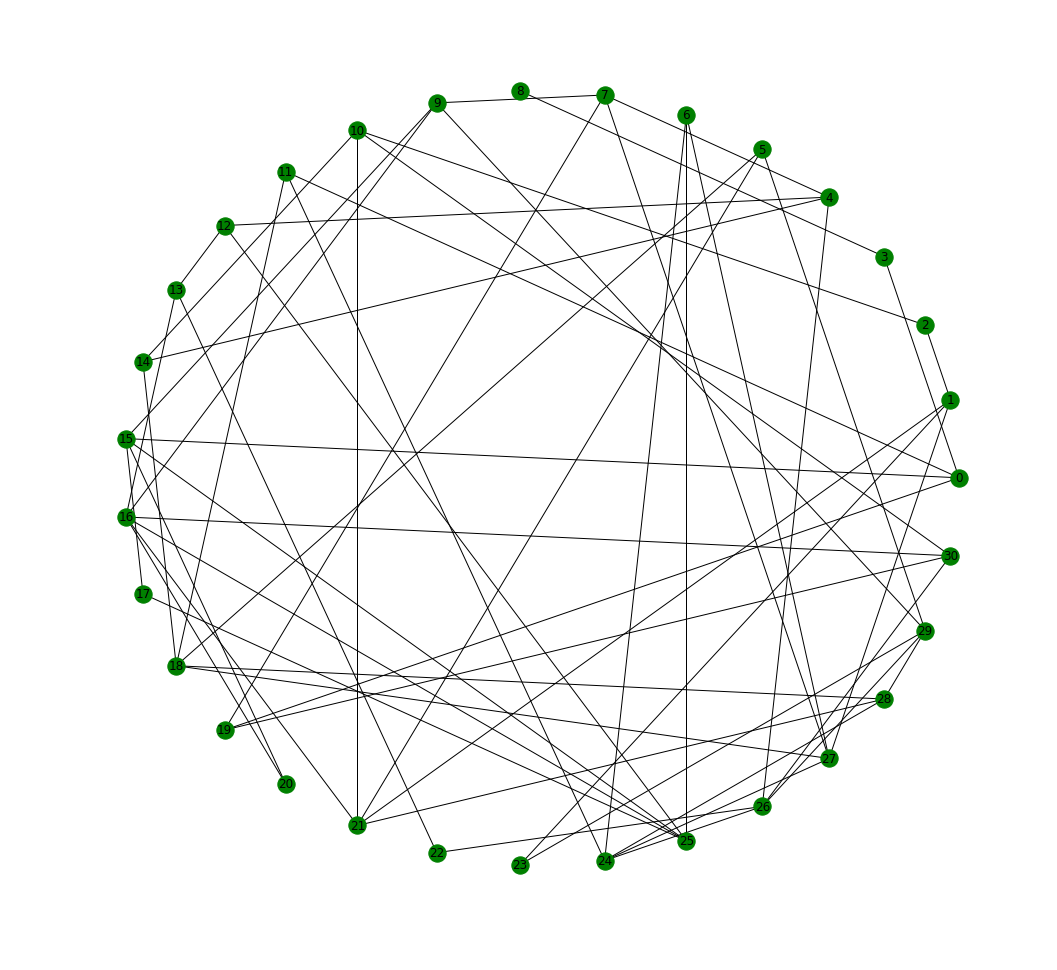

In [34]:
pos = nx.circular_layout(rg)
rg = nx.gnp_random_graph(31, 0.1)
nx.draw(rg, pos, with_labels = True, node_color = 'g')
plt.show()

In [35]:
c = nx.average_clustering(rg)
print("avg clustering coefficient = "+str(c))

avg clustering coefficient = 0.055913978494623665


In [36]:
l = nx.average_shortest_path_length(rg)
print(l)

2.7268817204301077


## The Average Degree Connectivity

In [14]:
nx.average_degree_connectivity(g)

{1: 1.375,
 2: 1.4166666666666667,
 3: 1.5,
 5: 4.733333333333333,
 6: 2.6666666666666665,
 11: 0.8181818181818182,
 16: 2.1875}

## Out-degree Centrality

In [15]:
od = nx.out_degree_centrality(g)
od

{'Africa': 0.0,
 'Belgium': 0.0,
 'Britain': 0.13333333333333333,
 'British Common Wealth': 0.16666666666666666,
 'China': 0.03333333333333333,
 'Crimea': 0.0,
 'Denmark': 0.0,
 'Estonia': 0.0,
 'Finland': 0.03333333333333333,
 'France': 0.1,
 'Germany': 0.43333333333333335,
 'Greece': 0.0,
 'Hungary': 0.03333333333333333,
 'Iran': 0.0,
 'Iraq': 0.0,
 'Italy': 0.16666666666666666,
 'Japan': 0.06666666666666667,
 'Latvia': 0.0,
 'Lebanon': 0.0,
 'Lithuania': 0.0,
 'Luxembourg': 0.0,
 'Malta': 0.0,
 'Netherlands': 0.0,
 'Norway': 0.0,
 'Poland': 0.0,
 'Romania': 0.03333333333333333,
 'Soviet Union': 0.2,
 'Syria': 0.0,
 'Tunisia': 0.0,
 'United States of America': 0.06666666666666667,
 'Yugoslavia': 0.0}

<font color = blue> Outdegree is the number of ties that the node directs to others
- Germany has the highest out - degree centrality which means that it invaded the most number of countries
- Africa, Belgium, Crimea, Denmark, Estonia, Greexe, Iran, Iraq, Latvia, Lebanon, Lithuania, Luxembourg, Malta, Netherlands, Norway, Poland, Syria, Tunisia and Yugoslavia all have an out-degree centrality of 0, which means that they didn't invade any countries


## In-degree Centrality

In [16]:
nx.in_degree_centrality(g)

{'Africa': 0.06666666666666667,
 'Belgium': 0.03333333333333333,
 'Britain': 0.06666666666666667,
 'British Common Wealth': 0.0,
 'China': 0.03333333333333333,
 'Crimea': 0.03333333333333333,
 'Denmark': 0.03333333333333333,
 'Estonia': 0.03333333333333333,
 'Finland': 0.03333333333333333,
 'France': 0.06666666666666667,
 'Germany': 0.1,
 'Greece': 0.06666666666666667,
 'Hungary': 0.0,
 'Iran': 0.06666666666666667,
 'Iraq': 0.03333333333333333,
 'Italy': 0.0,
 'Japan': 0.13333333333333333,
 'Latvia': 0.03333333333333333,
 'Lebanon': 0.03333333333333333,
 'Lithuania': 0.03333333333333333,
 'Luxembourg': 0.03333333333333333,
 'Malta': 0.03333333333333333,
 'Netherlands': 0.03333333333333333,
 'Norway': 0.03333333333333333,
 'Poland': 0.06666666666666667,
 'Romania': 0.0,
 'Soviet Union': 0.16666666666666666,
 'Syria': 0.03333333333333333,
 'Tunisia': 0.1,
 'United States of America': 0.03333333333333333,
 'Yugoslavia': 0.03333333333333333}

 <font color = blue> Indegree is a count of the number of ties directed to the node
 - The Soviet Union has the highest in-degree centrality which means it was invaded by the most number of countries
 - The British Common Wealth, Hungary, Italy and Romania all have an in-degree centrality of 0.0, which means they weren't invaded by any countries

## Closeness Centrality

In [17]:
close = nx.closeness_centrality(g)
close

{'Africa': 0.0,
 'Belgium': 0.0,
 'Britain': 0.36666666666666664,
 'British Common Wealth': 0.3885057471264368,
 'China': 0.05,
 'Crimea': 0.0,
 'Denmark': 0.0,
 'Estonia': 0.0,
 'Finland': 0.10909090909090909,
 'France': 0.3507246376811594,
 'Germany': 0.4888888888888888,
 'Greece': 0.0,
 'Hungary': 0.12564102564102564,
 'Iran': 0.0,
 'Iraq': 0.0,
 'Italy': 0.36226415094339626,
 'Japan': 0.07500000000000001,
 'Latvia': 0.0,
 'Lebanon': 0.0,
 'Lithuania': 0.0,
 'Luxembourg': 0.0,
 'Malta': 0.0,
 'Netherlands': 0.0,
 'Norway': 0.0,
 'Poland': 0.0,
 'Romania': 0.12564102564102564,
 'Soviet Union': 0.2,
 'Syria': 0.0,
 'Tunisia': 0.0,
 'United States of America': 0.07500000000000001,
 'Yugoslavia': 0.0}

<font color = blue> The normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.
- Germany has the highest closeness centrality which means that it was the most central country

## Connectivity Analysis

In [18]:
n = nx.node_connectivity(ug)
e = nx.edge_connectivity(ug)
#m = nx.minimum_degree(g)

print('kappa(ug) = ' +str(n)+' and lambda(ug) = ' +str(e))

kappa(ug) = 1 and lambda(ug) = 1


<font color = blue> The above values define
- the cardinality of a minimum vertex-cut (minimum number of vertices required to convert a connected graph into a disconnected graph) - kappa(ug) = 1 - which means removing just one country from the network of World War II will imply that there would be two completely disconneced wars taking place, and
- the cardinality of aminimum edge-cut(minimum number of edges required to convert a connected graph into a disconnected graph) - lambda(ug) =1 - which means removing just one link / invasion from the network of World War II will imply that there would be two completely disconnected wars taking place. 

## Average Neighbor Degree

In [19]:
def avg_neigh_degree(g):
     return dict((n,float(sum(g.degree(i) for i in g[n]))/g.degree(n)) for n in g.nodes() if g.degree(n))

{'British Common Wealth': 4.2, 'Hungary': 11.0, 'Soviet Union': 0.8181818181818182, 'China': 3.0, 'United States of America': 3.0, 'Germany': 2.1875, 'Japan': 0.8333333333333334, 'Italy': 5.0, 'Romania': 11.0, 'Finland': 5.5, 'France': 5.0, 'Britain': 4.5, 'Syria': 0.0, 'Iraq': 0.0, 'Africa': 0.0, 'Lebanon': 0.0, 'Iran': 0.0, 'Poland': 0.0, 'Lithuania': 0.0, 'Latvia': 0.0, 'Estonia': 0.0, 'Tunisia': 0.0, 'Greece': 0.0, 'Yugoslavia': 0.0, 'Denmark': 0.0, 'Norway': 0.0, 'Belgium': 0.0, 'Netherlands': 0.0, 'Luxembourg': 0.0, 'Crimea': 0.0, 'Malta': 0.0}


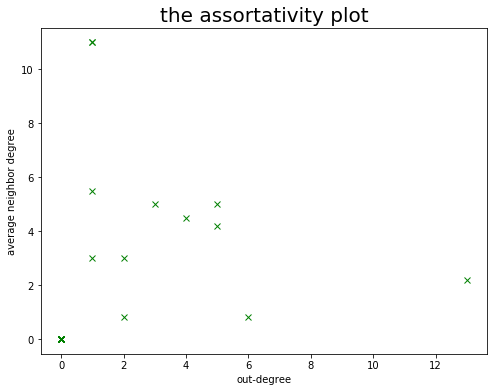

In [21]:
#plotting out-degree against average neighbor degree 

avgn = avg_neigh_degree(g)
avg = list(avgn.values())
out = list(outd.values())
print(avgn)

plt.plot(out, avg, 'gx')
plt.xlabel("out-degree")
plt.ylabel("average neighbor degree")
plt.title("the assortativity plot", fontsize = 20)
plt.savefig("assortativity.png")
plt.show()

<font color = blue> The above graph shows that nodes with a higher out-degree are connected to nodes with a lower out-degree, and thus this network is dissortative. This means countries such as Germany (who invaded 13 countries) invaded countries such as Norway and Denmark (both of whom invaded 0 countries). 

## Conclusion and Future Research

The different kinds of analyses done on the network provide answers to the questions asked. The interactions among the countries forms the foundation of international relations theory. Apart from answering the questions that have been asked initially, the network, along with further knowledge provides insights regarding the underlying cause of one country being invaded (economic/political/strategic) gain. It also gives a bird’s eye view of the war. The network is inconsistent in the aspect that only military conflicts are considered. It overlooks economic warfare such as embargos, taxes, etc. that could have led one country to retaliate with a military invasion. The network also does not convey the extent and intensity of the military invasion. However, further research and analysis in this front can be done by distinguishing edges by different characteristics such as colours to specify the kind of military conflict, to make the network clearer. 



References: 

The Wikipedia page for World War II was used as a reference to draw the graph. 

World War II. Wikipedia website. https://en.wikipedia.org/wiki/World_War_II. Accessed April 26, 2018. 
